In [1]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
def show_img(res):
    plt.imshow(res, cmap ='gray')
    plt.show()


In [2]:
la_pre_path = '/data1/zfx/code/latentAugmentation/predict/cop-6/BileDuct_010.nii.gz'
tag_pre_path = '/data1/zfx/data/BileDuct/predict/ATM_V9/postprocess/BileDuct_010.nii.gz'
label_path = '/data1/zfx/data/BileDuct/raw_data/labelsTs/BileDuct_010_label.nii.gz'

In [3]:
la_pre = sitk.ReadImage(la_pre_path)
la_pre = sitk.GetArrayFromImage(la_pre)

tag_pre = sitk.ReadImage(tag_pre_path)
tag_pre = sitk.GetArrayFromImage(tag_pre)

label = sitk.ReadImage(label_path)
label = sitk.GetArrayFromImage(label)

In [4]:
label = label[368][180:260,160:240]
la = la_pre[368][180:260,160:240]
tag = tag_pre[368][180:260,160:240]

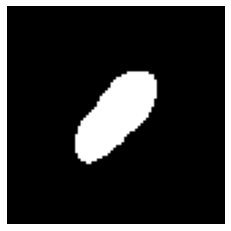

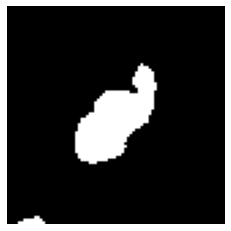

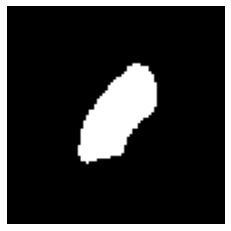

In [5]:
plt.imshow(label, cmap='gray')
plt.axis('off')
plt.show()

# 保存label为PNG格式
plt.imsave('label.png', label, cmap='gray')

plt.imshow(tag, cmap='gray')
plt.axis('off')
plt.show()

# 保存tag为PNG格式
plt.imsave('tag.png', tag, cmap='gray')


plt.imshow(la, cmap='gray')
plt.axis('off')
plt.show()

# 保存la为PNG格式
plt.imsave('la.png', la, cmap='gray')

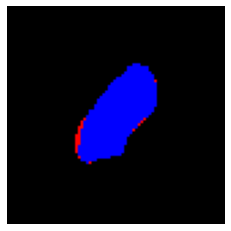

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# 读取真实标签和预测结果的二值图像
true_label = cv2.imread('label.png', cv2.IMREAD_GRAYSCALE)
predicted = cv2.imread('la.png', cv2.IMREAD_GRAYSCALE)

# 创建一个3通道的空白图像
h, w = true_label.shape
result = np.zeros((h, w, 3), dtype=np.uint8)

# 将真实标签设置为蓝色
result[true_label == 255] = (255, 0, 0)

# 将预测结果设置为红色
result[predicted == 255] = (0, 0, 255)

# 显示可视化结果
plt.imshow(result)
plt.axis('off')
plt.show()
